In [1]:
import os
import sys
import argparse
import torch
from getdist import plots, MCSamples
import getdist
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
path = os.path.realpath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, path)

In [3]:
from nnest.trainer import Trainer

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# Himmelblau
dims = 2
def loglike(z):
    z1 = z[:, 0]
    z2 = z[:, 1]
    return - (z1 ** 2 + z2 - 11.) ** 2 - (z1 + z2 ** 2 - 7.) ** 2
def transform(x):
    return 5. * x

In [6]:
# Rosenbrock
#dims = 2
#def loglike(z):
#    return np.array([-sum(100.0 * (x[1:] - x[:-1] ** 2.0) ** 2.0 + (1 - x[:-1]) ** 2.0) for x in z])
#def transform(x):
#    return 5. * x

In [7]:
# Gauss
#dims = 2
#corr = 0.99
#def loglike(x):
#    return multivariate_normal.logpdf(x, mean=np.zeros(dims), cov=np.eye(dims) + corr * (1 - np.eye(dims)))
#def transform(x):
#    return 3. * x

In [8]:
n_samples = 1000
fraction = 0.02

In [9]:
np.random.seed(0)
x = 2 * (np.random.uniform(size=(int(n_samples / fraction), 2)) - 0.5)
likes = loglike(transform(x))
idx = np.argsort(-likes)
samples = x[idx[0:n_samples]]

In [10]:
t = Trainer(dims, 64,  num_blocks=5, num_layers=1, scale='constant')

[nnest.trainer] [INFO] SingleSpeed(
  (net): FlowSequential(
    (0): CouplingLayer(
      (translate_net): Sequential(
        (0): Linear(in_features=2, out_features=64, bias=True)
        (1): ReLU()
        (2): Linear(in_features=64, out_features=64, bias=True)
        (3): ReLU()
        (4): Linear(in_features=64, out_features=2, bias=True)
      )
    )
    (1): ScaleLayer()
    (2): CouplingLayer(
      (translate_net): Sequential(
        (0): Linear(in_features=2, out_features=64, bias=True)
        (1): ReLU()
        (2): Linear(in_features=64, out_features=64, bias=True)
        (3): ReLU()
        (4): Linear(in_features=64, out_features=2, bias=True)
      )
    )
    (3): ScaleLayer()
    (4): CouplingLayer(
      (translate_net): Sequential(
        (0): Linear(in_features=2, out_features=64, bias=True)
        (1): ReLU()
        (2): Linear(in_features=64, out_features=64, bias=True)
        (3): ReLU()
        (4): Linear(in_features=64, out_features=2, bias=True)


In [11]:
t.train(samples, jitter=0.01)

[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0100]
[nnest.trainer] [INFO] Epoch [1] train loss [0.0217] validation loss [0.0215]
[nnest.trainer] [INFO] Epoch [50] train loss [0.0176] validation loss [0.0173]
[nnest.trainer] [INFO] Epoch [100] train loss [0.0139] validation loss [0.0138]
[nnest.trainer] [INFO] Epoch [150] train loss [0.0115] validation loss [0.0113]
[nnest.trainer] [INFO] Epoch [200] train loss [0.0096] validation loss [0.0093]
[nnest.trainer] [INFO] Epoch [250] train loss [0.0080] validation loss [0.0077]
[nnest.trainer] [INFO] Epoch [300] train loss [0.0067] validation loss [0.0063]
[nnest.trainer] [INFO] Epoch [350] train loss [0.0059] validation loss [0.0054]
[nnest.trainer] [INFO] Epoch [400] train loss [0.0051] validation loss [0.0046]
[nnest.trainer] [INFO] Epoch [450] train loss [0.0048] validation loss [0.0042]
[nnest.trainer] [INFO] Epoch [500] train loss [0.0045] validation loss [0.0039]
[nnest.trainer] [I

In [13]:
x_synth = t.netG.sample(samples.size).detach().cpu().numpy()
z = t.get_latent_samples(samples)

In [14]:
grid = []
for x in np.linspace(np.min(samples[:, 0])*1.2, np.max(samples[:, 0])*1.2, 10):
    for y in np.linspace(np.min(samples[:, 1])*1.2, np.max(samples[:, 1])*1.2, 5000):
        grid.append([x, y])
for y in np.linspace(np.min(samples[:, 1])*1.2, np.max(samples[:, 1])*1.2, 10):
    for x in np.linspace(np.min(samples[:, 0])*1.2, np.max(samples[:, 0])*1.2, 5000):
        grid.append([x, y])
grid = np.array(grid)
z_grid = t.get_latent_samples(grid)

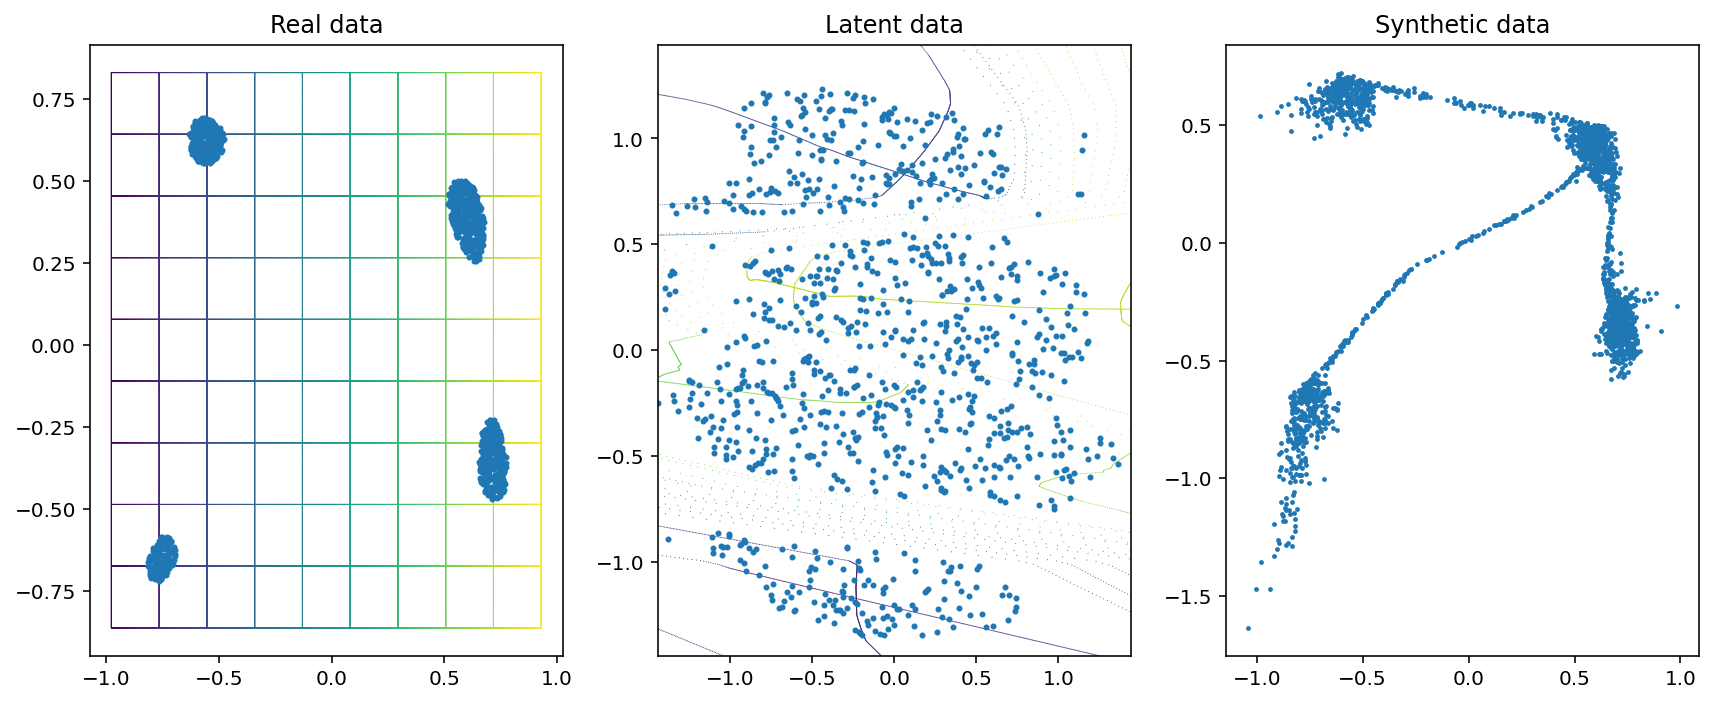

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
ax[0].scatter(grid[:, 0], grid[:, 1], c=grid[:, 0], marker='.', s=1, linewidths=0)
ax[0].scatter(samples[:, 0], samples[:, 1], s=4)
ax[0].set_title('Real data')
ax[1].scatter(z_grid[:, 0], z_grid[:, 1], c=grid[:, 0], marker='.', s=1, linewidths=0)
ax[1].scatter(z[:, 0], z[:, 1], s=4)
ax[1].set_title('Latent data')
ax[1].set_xlim([-np.max(np.abs(z)), np.max(np.abs(z))])
ax[1].set_ylim([-np.max(np.abs(z)), np.max(np.abs(z))])
ax[2].scatter(x_synth[:, 0], x_synth[:, 1], s=2)
ax[2].set_title('Synthetic data')
plt.tight_layout()
plt.show()